In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib nbagg

In [53]:
lam = 0.62
c_p = 4200
r = 0.085
T_env = 23
P = 400
m = 1
N = 100
h = 10 # 10 # ????
h_water = 10000

V = 1e-3 * m

eta = c_p * m * (62-23) / P / 522

A_c = np.pi * r ** 2
h_c = V / N / A_c
A_m = h_c * 2 * r * np.pi
rho = m / V
m_x = m / N

In [54]:

Q_env = T_env * (c_p * m_x)
alpha = -h * A_m * c_p * m_x
beta = lam / (h_c ** 2 * c_p * m_x)
alpha2 = alpha - h * A_c * c_p * m_x

In [55]:
alpha = -h * A_m / (c_p * m_x)
beta = lam / (rho * c_p * h_c ** 2) + h_water * A_c / (c_p * m_x)
alpha2 = alpha - h * A_c / (c_p * m_x)

In [56]:
h_water * A_c / (c_p * m_x), lam / (rho * c_p * h_c ** 2)

(5.4042873624253005, 0.7605326221632418)

In [57]:
a = lam / (rho * c_p)
a

1.4761904761904763e-07

In [58]:
beta

6.164819984588542

In [59]:
A = np.diag([alpha - 2 * beta] * N)

In [60]:
A[range(1, N), range(0, N-1)] = beta
A[range(0, N-1), range(1, N)] = beta

In [61]:
A[0, 0] = alpha2 - beta
A[-1, -1] = alpha2 - beta

In [62]:
B = np.zeros((N, 2))
B[0, 0] = P * eta / (c_p * m_x)

In [63]:
B[:, 1] = -alpha
B[0, 1] = -alpha2
B[-1, 1] = -alpha2

In [64]:
#u = np.array([[1, Q_env]]).transpose()
#u = np.array([[0, Q_env]]).transpose()
u = np.array([[0, T_env]]).transpose()

In [65]:
#initial_state = np.array([[Q_env] * N]).transpose()
initial_state = np.array([[T_env] * N]).transpose()

In [66]:
state = np.float64(initial_state)

In [67]:
#np.dot(A, state) + np.dot(B, u)

In [68]:
#u = np.array([[1, Q_env]]).transpose()
u = np.array([[1, T_env]]).transpose()

In [69]:
dt = 0.01
T = 522

In [70]:
num_steps = int(T / dt)
evolution = np.zeros((num_steps * 2, len(state)))

In [71]:
for t in tqdm_notebook(range(int(T / dt))):
    d_state = (np.dot(A, state) + np.dot(B, u)) * dt
    state += d_state
    evolution[t, :] = state.transpose()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [72]:
#u = np.array([[0, Q_env]]).transpose()
u = np.array([[0, T_env]]).transpose()

In [73]:
for t in tqdm_notebook(range(int(T / dt))):
    d_state = (np.dot(A, state) + np.dot(B, u)) * dt
    state += d_state
    evolution[num_steps + t, :] = state.transpose()

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [81]:
evolution[int(522 / dt), N // 2], max(evolution[:, N // 2]), np.dot(evolution[int(522 / dt), [0, -1]], [1, -1])

(54.898889029442813, 58.957351387580893, 55.326289777707331)

<IPython.core.display.Javascript object>


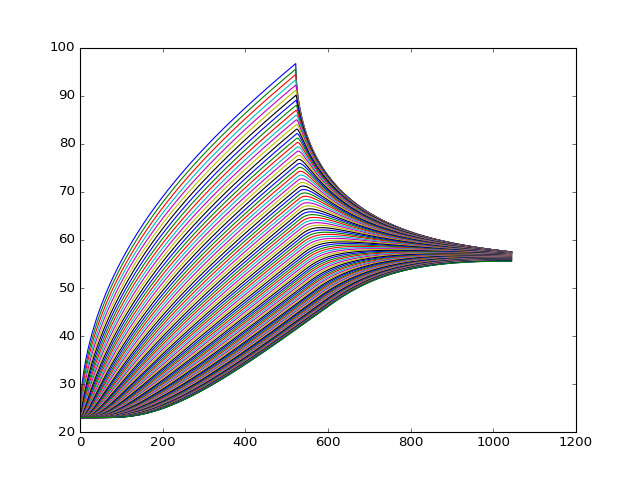

In [75]:
plt.figure()
#plt.plot(evolution[:, ::] / (c_p * m_x))
plt.plot(np.arange(len(evolution)) * dt, evolution[:, ::])

In [76]:
evolution[:10, 0]

array([ 23.07471264,  23.14481531,  23.21087639,  23.27337667,
        23.33272448,  23.38926796,  23.4433052 ,  23.49509241,
        23.54485079,  23.59277201])